In [1]:
# loading the required libraries
import os
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

#### Before applying filters(included augmented files)

In [6]:
# image size, image height and image width

img_width=224; img_height=224

# number of smaples taken one at a time is batch_size
batch_size=8

# The number of images generating in training data 

TRAINING_DIR = 'train/'

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30, # rotation of images upto 30 images
                                   zoom_range=0.4, # zooming the images of 0.4
                                   horizontal_flip=True # flipping the images 
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical', # mode is categorical because the 4 class
                                                    target_size=(img_height, img_width))

# Same processing on validation data 

VALIDATION_DIR = 'valid/'

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical', # 4 class
                                                              target_size=(img_height, img_width)
                                                             )

Found 1100 images belonging to 4 classes.
Found 435 images belonging to 4 classes.


In [ ]:
# image size, image height and image width

img_width=224; img_height=224

# number of smaples taken one at a time is batch_size
batch_size=8

# The number of images generating in training data 

TRAINING_DIR = 'train/'

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30, # rotation of images upto 30 images
                                   zoom_range=0.4, # zooming the images of 0.4
                                   horizontal_flip=True # flipping the images 
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical', # mode is categorical because the 4 class
                                                    target_size=(img_height, img_width))

# Same processing on validation data 

VALIDATION_DIR = 'valid/'

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical', # 4 class
                                                              target_size=(img_height, img_width)
                                                             )

In [7]:
# Building the model by using the VGG16 architure of CNN  

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = 'model_files/vgg16_drop_batch_best_weights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)
vgg16_base = VGG16(include_top=True,
                   input_tensor=None, input_shape=(img_height, img_width, 3))

553467904/553467096 [==============================] - 210s 0us/step


In [12]:
print('Adding new layers...')
output = vgg16_base.get_layer(index = -1).output  
output = Flatten()(output)
# let's add a fully-connected layer
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
# and a logistic layer -- let's say we have 4 classes
output = Dense(4, activation='softmax')(output)
print('New layers added!')

vgg16_model = Model(vgg16_base.input, output)
for layer in vgg16_model.layers[:-7]:
    layer.trainable = False

vgg16_model.summary()

Adding new layers...
New layers added!
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPool

In [13]:
# compiling the model with optimizer adam

vgg16_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])



# fitting the model on training generator model
history = vgg16_model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

C:\Users\saira\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
138/138 [==============================] - 820s 6s/step - loss: 1.6915 - accuracy: 0.4302 - val_loss: 1.1221 - val_accuracy: 0.4391
Epoch 2/30
138/138 [==============================] - 814s 6s/step - loss: 1.1726 - accuracy: 0.5748 - val_loss: 1.2300 - val_accuracy: 0.3011
Epoch 3/30
138/138 [==============================] - 888s 6s/step - loss: 0.9614 - accuracy: 0.6332 - val_loss: 1.3256 - val_accuracy: 0.5126
Epoch 4/30
138/138 [==============================] - 780s 6s/step - loss: 0.8475 - accuracy: 0.6446 - val_loss: 1.5669 - val_accuracy: 0.4299
Epoch 5/30
138/138 [==============================] - 587s 4s/step - loss: 0.8634 - accuracy: 0.6317 - val_loss: 1.8180 - val_accuracy: 0.5057
Epoch 6/30
138/138 [==============================] - 579s 4s/step - loss: 0.7395 - accuracy: 0.6987 - val_loss: 1.7146 - val_accuracy: 0.5356
Epoch 7/30
138/138 [==============================] - 543s 4s/step - loss: 0.7763 - accuracy: 0.6663 - val_loss: 2.2891 - val_accuracy: 0.4874

In [15]:
## Saving the model file
target_dir = 'model_files/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
vgg16_model.save(target_dir + 'vgg16_model.h5')
vgg16_model.save_weights(target_dir + 'vgg16_weights.h5')

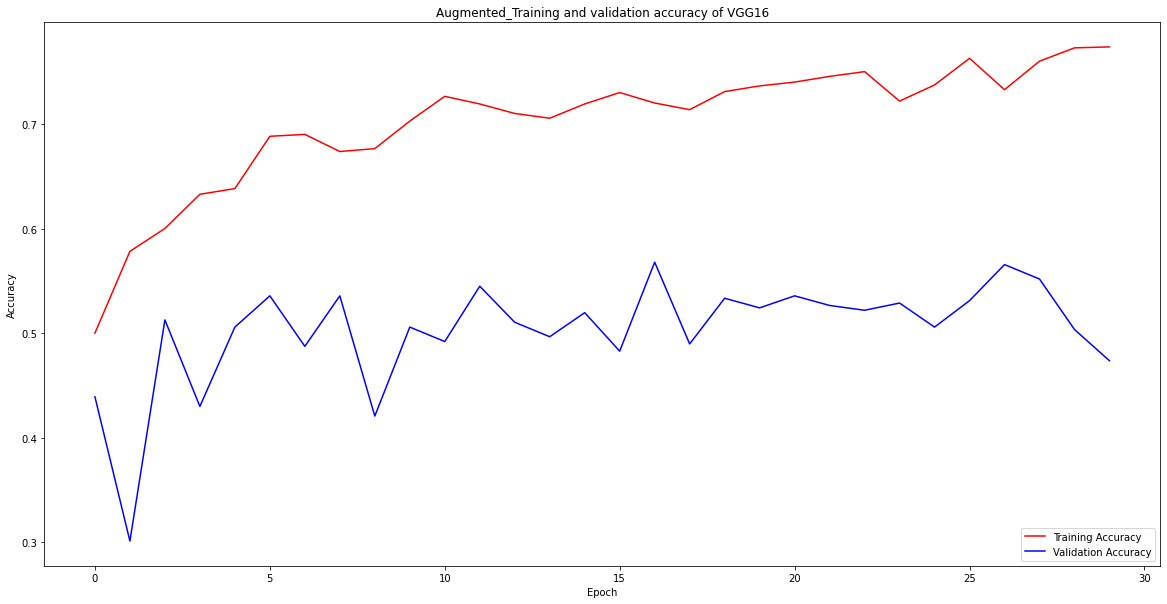

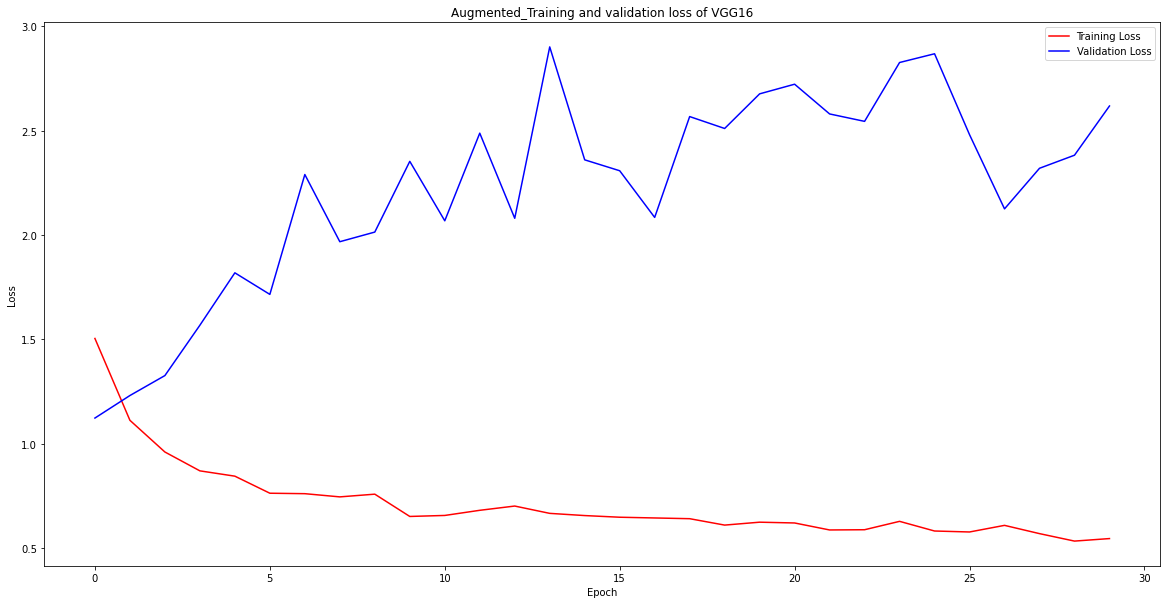

In [16]:
# Sotring the Training Accuracy and Loss, Validation Accuracy and Loss

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

# Plotting the Training Accuracy and Validation Accuracy

fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Augmented_Training and validation accuracy of VGG16')
plt.legend(loc='lower right')
plt.show()
fig.savefig('output_images/Augmented_Accuracy_curve_vgg16_drop_batch_256.jpg')


# Plotting the Training Loss and Validation Loss

fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Augmented_Training and validation loss of VGG16')
fig2.savefig('output_images/Augmented_Loss_curve_vgg16_drop_batch_256.jpg')


#### After applying Filters(included filters & aug files)

In [2]:
# image size, image height and image width

img_width=224; img_height=224

# number of smaples taken one at a time is batch_size
batch_size=8

# The number of images generating in training data 

TRAINING_DIR = '/insofe/Projects/Some_Project/Tensorflow/BCS challenge/Chandra_BCS_Challange/data/train/'

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30, # rotation of images upto 30 images
                                   zoom_range=0.4, # zooming the images of 0.4
                                   horizontal_flip=True # flipping the images 
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical', # mode is categorical because the 4 class
                                                    target_size=(img_height, img_width))

# Same processing on validation data 

VALIDATION_DIR = '/insofe/Projects/Some_Project/Tensorflow/BCS challenge/Chandra_BCS_Challange/data/valid/'

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical', # 4 class
                                                              target_size=(img_height, img_width)
                                                             )

Found 2466 images belonging to 4 classes.
Found 719 images belonging to 4 classes.


In [5]:
# Building the model by using the VGG16 architure of CNN  

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = 'new_models/vgg16.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)
vgg16_base = VGG16(include_top=True,
                   input_tensor=None, input_shape=(img_height, img_width, 3))
print('Adding new layers...')
output = vgg16_base.get_layer(index = -1).output  
output = Flatten()(output)
# let's add a fully-connected layer
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
# and a logistic layer -- let's say we have 4 classes
output = Dense(4, activation='softmax')(output)
print('New layers added!')


vgg16_model = Model(vgg16_base.input, output)
for layer in vgg16_model.layers[:-7]:
    layer.trainable = False

vgg16_model.summary()

Adding new layers...
New layers added!
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPool

In [ ]:
# compiling the model with optimizer adam

vgg16_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics =['accuracy'])



# fitting the model on training generator model
history = vgg16_model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
309/309 [==============================] - 1034s 3s/step - loss: 0.9335 - accuracy: 0.6835 - val_loss: 1.1346 - val_accuracy: 0.6606
Epoch 2/30
309/309 [==============================] - 1000s 3s/step - loss: 0.8046 - accuracy: 0.6905 - val_loss: 1.4287 - val_accuracy: 0.6940
Epoch 3/30
309/309 [==============================] - 950s 3s/step - loss: 0.8341 - accuracy: 0.6960 - val_loss: 1.3119 - val_accuracy: 0.7038
Epoch 4/30
309/309 [==============================] - 1050s 3s/step - loss: 0.7670 - accuracy: 0.7243 - val_loss: 1.3484 - val_accuracy: 0.6898
Epoch 5/30
309/309 [==============================] - 1101s 4s/step - loss: 0.7592 - accuracy: 0.7134 - val_loss: 1.3539 - val_accuracy: 0.6634
Epoch 6/30
309/309 [==============================] - 1440s 5s/step - loss: 0.7124 - accuracy: 0.7180 - val_loss: 1.4022 - val_accuracy: 0.6940
Epoch 7/30
309/309 [==============================] - 1632s 5s/step - loss: 0.7594 - accuracy: 0.7386 - val_loss: 1.5429 - val_accuracy: 

In [ ]:
## Saving the model file
target_dir = 'model_files/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
vgg16_model.save(target_dir + 'vgg16_model.h5')
vgg16_model.save_weights(target_dir + 'vgg16_weights.h5')

In [ ]:
# Sotring the Training Accuracy and Loss, Validation Accuracy and Loss

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

# Plotting the Training Accuracy and Validation Accuracy

fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Augmented_Training and validation accuracy of VGG16')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Augmented_Accuracy_curve_vgg16_drop_batch_256.jpg')


# Plotting the Training Loss and Validation Loss

fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Augmented_Training and validation loss of VGG16')
fig2.savefig('Augmented_Loss_curve_vgg16_drop_batch_256.jpg')
